# Analisis Bisnis Penjualan Tiket Pesawat
Analisis ini bertujuan memberikan insight mendalam terkait penjualan tiket pesawat berdasarkan data historis, serta rekomendasi dan strategi bisnis untuk meningkatkan performa penjualan dan kepuasan pelanggan.

In [70]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data
df = pd.read_csv("penjualan_tiket_pesawat.csv")

In [71]:
# Informasi umum data
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   500 non-null    int64  
 1   City             500 non-null    object 
 2   Gender           500 non-null    object 
 3   Date             500 non-null    object 
 4   Ticket_Quantity  500 non-null    int64  
 5   Ticket_Price     500 non-null    float64
 6   Airline          500 non-null    object 
 7   Payment_Method   500 non-null    object 
 8   Total            500 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


,Transaction_ID,Ticket_Quantity,Ticket_Price,Total
count,500.000000,500.000000,5.000000e+02,5.000000e+02
mean,250.500000,3.032000,1.251348e+06,3.793494e+06
std,144.481833,1.383765,4.433147e+05,2.265379e+06
min,1.000000,1.000000,5.092100e+05,5.280000e+05
25%,125.750000,2.000000,8.493028e+05,1.889234e+06
50%,250.500000,3.000000,1.233666e+06,3.485085e+06
75%,375.250000,4.000000,1.649518e+06,5.244934e+06
max,500.000000,5.000000,1.997273e+06,9.972850e+06


In [72]:
# Cek missing value dan duplikasi
print('Jumlah missing value tiap kolom:')
print(df.isnull().sum())
print('\nJumlah baris duplikat:', df.duplicated().sum())

Jumlah missing value tiap kolom:
Transaction_ID     0
City               0
Gender             0
Date               0
Ticket_Quantity    0
Ticket_Price       0
Airline            0
Payment_Method     0
Total              0
dtype: int64

Jumlah baris duplikat: 0


## Analisis Penjualan Berdasarkan Kota

C:\Users\User\AppData\Local\Temp\ipykernel_10048\328862004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='City', order=df['City'].value_counts().index, palette='viridis')


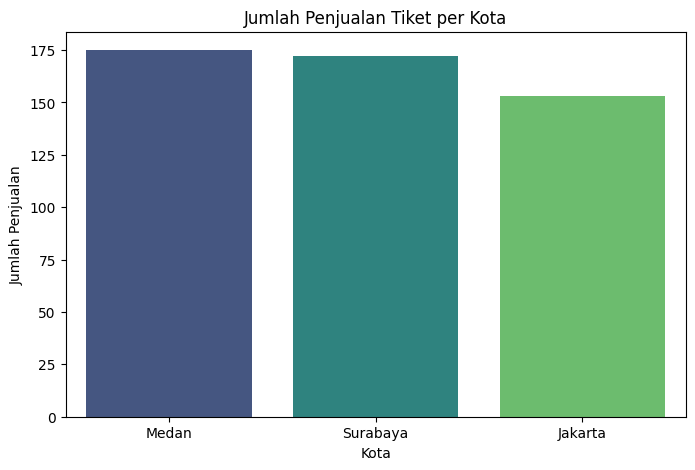

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='City', order=df['City'].value_counts().index, palette='viridis')
plt.title('Jumlah Penjualan Tiket per Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [74]:
city_sales = df['City'].value_counts()
print('Kota dengan penjualan terbanyak:', city_sales.idxmax())
print('Kota dengan penjualan terendah:', city_sales.idxmin())
""" 
Keterangan:
- Kota dengan penjualan tiket terbanyak bisa jadi target promosi utama.
- Kota dengan penjualan rendah perlu dievaluasi, apakah karena kurangnya permintaan atau masalah lain seperti harga atau aksesibilitas.
"""

Kota dengan penjualan terbanyak: Medan
Kota dengan penjualan terendah: Jakarta


' \nKeterangan:\n- Kota dengan penjualan tiket terbanyak bisa jadi target promosi utama.\n- Kota dengan penjualan rendah perlu dievaluasi, apakah karena kurangnya permintaan atau masalah lain seperti harga atau aksesibilitas.\n'

## Analisis Penjualan Berdasarkan Maskapai

C:\Users\User\AppData\Local\Temp\ipykernel_10048\4154020898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index, palette='Set2')


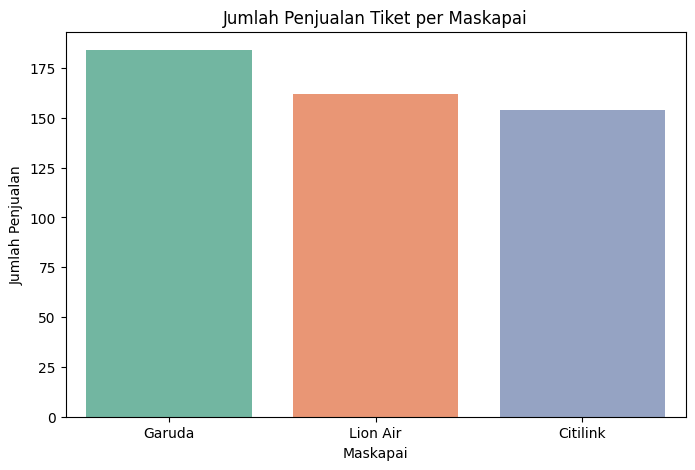

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index, palette='Set2')
plt.title('Jumlah Penjualan Tiket per Maskapai')
plt.xlabel('Maskapai')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [76]:
airline_sales = df['Airline'].value_counts()
print('Maskapai terlaris:', airline_sales.idxmax())
print('Maskapai perlu evaluasi:', airline_sales.idxmin())
"""
- Maskapai dengan penjualan tertinggi dapat dijadikan mitra strategis.
- Maskapai dengan penjualan rendah dapat dievaluasi untuk peningkatan kerja sama atau promosi khusus.
"""

Maskapai terlaris: Garuda
Maskapai perlu evaluasi: Citilink


'\n- Maskapai dengan penjualan tertinggi dapat dijadikan mitra strategis.\n- Maskapai dengan penjualan rendah dapat dievaluasi untuk peningkatan kerja sama atau promosi khusus.\n'

## Analisis Penjualan Berdasarkan Metode Pembayaran

C:\Users\User\AppData\Local\Temp\ipykernel_10048\3410537851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index, palette='Set1')


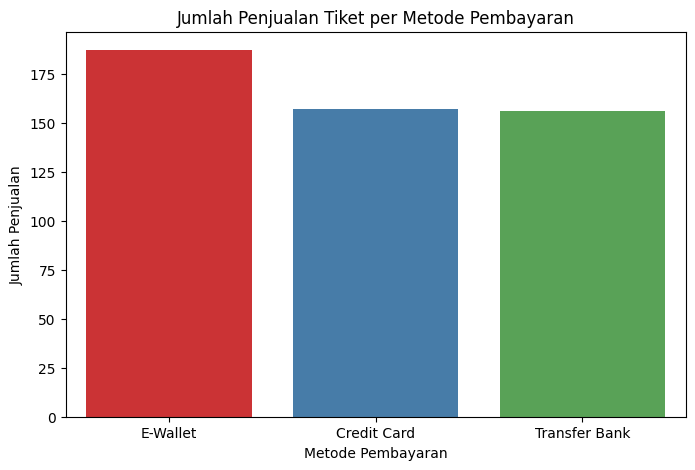

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index, palette='Set1')
plt.title('Jumlah Penjualan Tiket per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [78]:
payment_sales = df['Payment_Method'].value_counts()
print('Metode pembayaran favorit:', payment_sales.idxmax())
print('Metode pembayaran kurang diminati:', payment_sales.idxmin())
"""
- Metode pembayaran paling populer dapat dioptimalkan, misal dengan promo cashback atau diskon.
- Metode yang kurang diminati bisa dievaluasi, apakah karena kurangnya edukasi atau kendala teknis.
"""

Metode pembayaran favorit: E-Wallet
Metode pembayaran kurang diminati: Transfer Bank


'\n- Metode pembayaran paling populer dapat dioptimalkan, misal dengan promo cashback atau diskon.\n- Metode yang kurang diminati bisa dievaluasi, apakah karena kurangnya edukasi atau kendala teknis.\n'

## Analisis Penjualan Berdasarkan Gender

C:\Users\User\AppData\Local\Temp\ipykernel_10048\419055335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


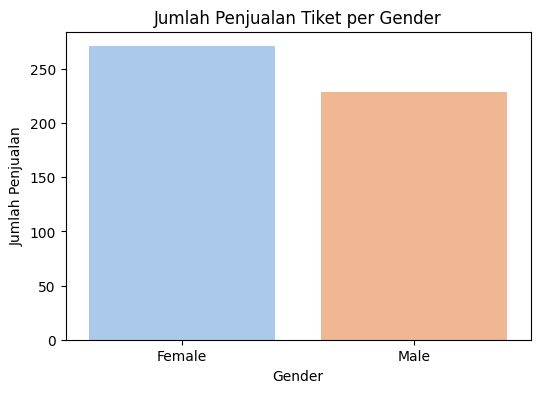

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Jumlah Penjualan Tiket per Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [80]:
gender_sales = df['Gender'].value_counts()
print('Gender pembeli terbanyak:', gender_sales.idxmax())
"""
- Segmentasi gender dapat digunakan untuk membuat kampanye pemasaran yang lebih relevan.
"""

Gender pembeli terbanyak: Female


'\n- Segmentasi gender dapat digunakan untuk membuat kampanye pemasaran yang lebih relevan.\n'

## Analisis Tren Penjualan Bulanan

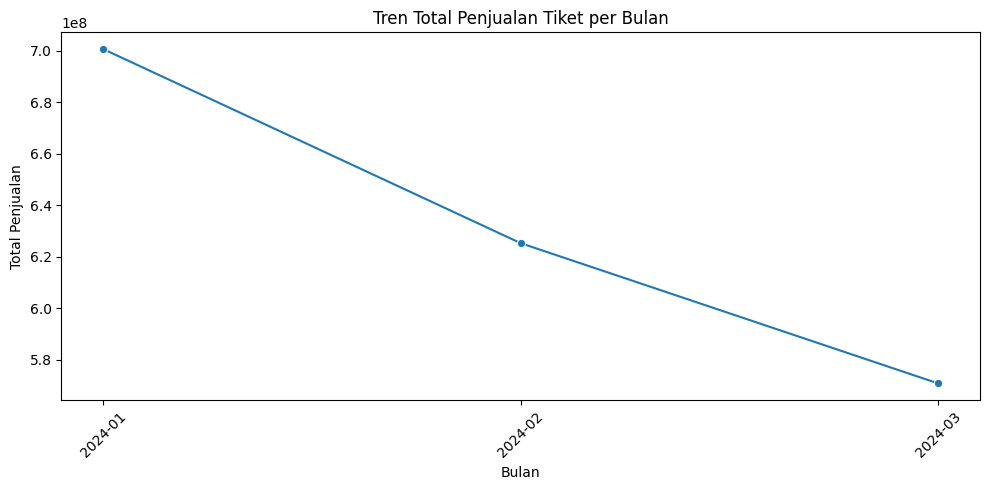

Bulan penjualan tertinggi: 2024-01
Bulan penjualan terendah: 2024-03


In [81]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month', as_index=False)['Total'].sum()

# Pastikan kolom 'Month' bertipe string agar seaborn tidak error di masa depan
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Total', marker='o')
plt.title('Tren Total Penjualan Tiket per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan bulan penjualan tertinggi dan terendah
top_month = monthly_sales.loc[monthly_sales['Total'].idxmax(), 'Month']
low_month = monthly_sales.loc[monthly_sales['Total'].idxmin(), 'Month']
print('Bulan penjualan tertinggi:', top_month)
print('Bulan penjualan terendah:', low_month)

## Korelasi Fitur Numerik

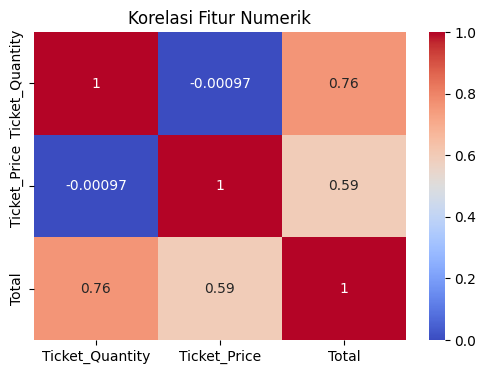

Korelasi fitur numerik:
                 Ticket_Quantity  Ticket_Price     Total
Ticket_Quantity         1.000000     -0.000970  0.759593
Ticket_Price           -0.000970      1.000000  0.593715
Total                   0.759593      0.593715  1.000000


'\n- Korelasi positif antara jumlah tiket, harga, dan total penjualan menandakan bahwa strategi upselling (menjual lebih banyak tiket per transaksi) dan penyesuaian harga bisa berdampak signifikan pada total penjualan.\n'

In [82]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Ticket_Quantity','Ticket_Price','Total']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

corr = df[['Ticket_Quantity','Ticket_Price','Total']].corr()
print('Korelasi fitur numerik:')
print(corr)
"""
- Korelasi positif antara jumlah tiket, harga, dan total penjualan menandakan bahwa strategi upselling (menjual lebih banyak tiket per transaksi) dan penyesuaian harga bisa berdampak signifikan pada total penjualan.
"""

# Rekomendasi Bisnis dan Strategi
1. Fokus promosi di kota dengan penjualan tinggi, riset kota dengan penjualan rendah.
2. Perkuat kerja sama dengan maskapai terlaris.
3. Optimalkan metode pembayaran favorit untuk promo.
4. Buat campaign berdasarkan gender dan kota.
5. Siapkan promo khusus di bulan rendah, maksimalkan bulan puncak.
6. Tawarkan bundling/upselling tiket.